#### Cut Out

[Reference] Terrance DeVries, Graham W. Taylor (2017) "Improved Regularization of Convolutional Neural Networks with Cutout", CVPR2017

- 목적: 이미지의 일부분을 가려서 모델이 중요한 부분 외에도 다양한 특징을 학습하도록 유도
- 효과: 특정 지역에 과도하게 의존하지 않게 하고, 일반화 성능 향상 (→ 과적합 방지)
- 작동 방식: 이미지에서 무작위 위치를 선택해 정해진 크기의 패치를 0으로 덮음

In [1]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class CutOut:
  def __init__(self, ratio=.5): # cutout을 적용할 확률을 조절함
      self.ratio = int(1/ratio) # 2
          
  def __call__(self, inputs):
      active = int(np.random.randint(0, self.ratio, 1))
      
      if active == 0:
          _, h, w = inputs.size()
          min_len = min(h, w)
          w_c = int(np.random.randint(2, 8, 1))
          h_c = int(np.random.randint(2, 8, 1))
          w_size = int(min_len//w_c)
          h_size = int(min_len//h_c)
          th = max(w_size, h_size)
          idx = int(np.random.randint(0, min_len-th, 1)) # 자를 위치(idx)를 무작위로 설정
          inputs[:,idx:idx+h_size,idx:idx+w_size] = 0 # 0으로 바꿈 -> 네모 영역이 만들어 진다.
      
      return inputs

In [3]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

100%|██████████| 170M/170M [00:18<00:00, 9.08MB/s] 


In [4]:
def imshow(img):
    plt.figure(figsize=(20,200))
    plt.imshow(img.permute(1,2,0).numpy()) # [C, H, W] → [H, W, C]로 바꿔야 plt.imshow에 맞게 표시됨
    plt.show()

/var/folders/vs/v7z0209n72x78lf01cg7mzzw0000gn/T/ipykernel_41611/2509567702.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  active = int(np.random.randint(0, self.ratio, 1))
/var/folders/vs/v7z0209n72x78lf01cg7mzzw0000gn/T/ipykernel_41611/2509567702.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_c = int(np.random.randint(2, 8, 1))
/var/folders/vs/v7z0209n72x78lf01cg7mzzw0000gn/T/ipykernel_41611/2509567702.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25

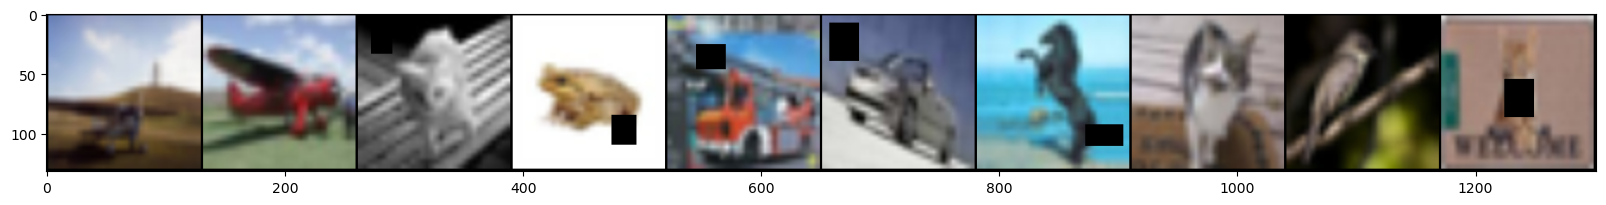

torch.Size([10, 3, 128, 128])


In [5]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size())